In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings .filterwarnings('ignore')

In [49]:
train=pd.read_csv(r"C:\Users\DELL\Downloads\internship\train (1).csv")
train.head()#which corresponds to the first five rows of the table in train data.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
test=pd.read_csv(r"C:\Users\DELL\Downloads\test (2).csv")
test.head()#which corresponds to the first five rows of the table in test data.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
train.shape
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
test.shape
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [65]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [73]:
train['Source']='train'
test['Source']='test'

In [74]:
df=pd.concat([train,test],axis=0)

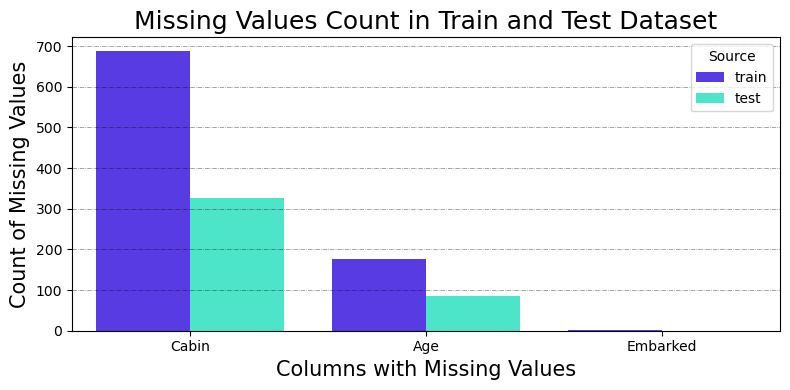

In [75]:
melted_df = pd.melt(df, id_vars='Source', value_vars=['Cabin', 'Age', 'Embarked'], var_name='column', value_name='is_missing')
melted_df['missing'] = melted_df['is_missing'].isnull()
missing_data_df = melted_df[melted_df['missing']]


plt.figure(figsize=(8, 4))
sns.countplot(data=missing_data_df, x='column', hue='Source', palette=palette_colors)


plt.grid(color="black", linestyle="-.", linewidth=0.5, axis='y', alpha=0.5)
plt.title('Missing Values Count in Train and Test Dataset', size=18)
plt.xlabel('Columns with Missing Values', size=15)
plt.ylabel('Count of Missing Values', size=15)

plt.legend(title='Source')
plt.tight_layout() 
plt.show()

In [78]:
#univariate Analysis
def plot_countplot(df, column, first_title, second_title=None, hue="Source"):    
    if second_title is not None:
       
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        total_axes = 2
    else:     
        f, ax1 = plt.subplots(1, 1, figsize=(6, 4))
        total_axes = 1
    
    sns.countplot(x=column, data=df, hue="Survived", palette=palette_colors, ax=ax1)
    ax1.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", alpha=0.5)
    ax1.set_title(f"Total Passengers / {first_title}")
    
    if total_axes == 2:
        sns.countplot(x=column, data=df, hue=hue, palette=palette_colors, ax=ax2)
        ax2.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", alpha=0.5)
        ax2.set_title(f"Total Passengers / {second_title}")
    
    plt.show()  

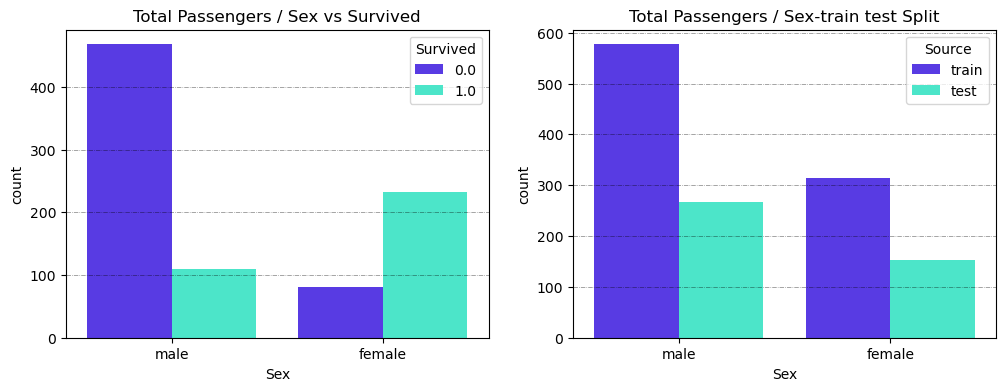

In [80]:
plot_countplot(df, "Sex", "Sex vs Survived", "Sex-train test Split")


In [81]:
total_passengers_by_sex = df['Sex'].value_counts()#which counts the occurrences of each unique value in the specified column ('Sex' in this case).
survivors_by_sex = df[df['Survived'] == 1]['Sex'].value_counts()#then calculates the number of survivors grouped by sex using value_counts().
survival_rates_by_sex = survivors_by_sex / total_passengers_by_sex# This gives the proportion of survivors out of the total passengers for each sex.


print(f"Total passengers by sex:\n{total_passengers_by_sex}\n")
print(f"Survivors by sex:\n{survivors_by_sex}\n")  #Overall, this code provides insights into the distribution of passengers by sex, the number of survivors by sex, and the survival rates for each sex.
print(f"Survival rates by sex:\n{survival_rates_by_sex}")

Total passengers by sex:
male      843
female    466
Name: Sex, dtype: int64

Survivors by sex:
female    233
male      109
Name: Sex, dtype: int64

Survival rates by sex:
female    0.5000
male      0.1293
Name: Sex, dtype: float64


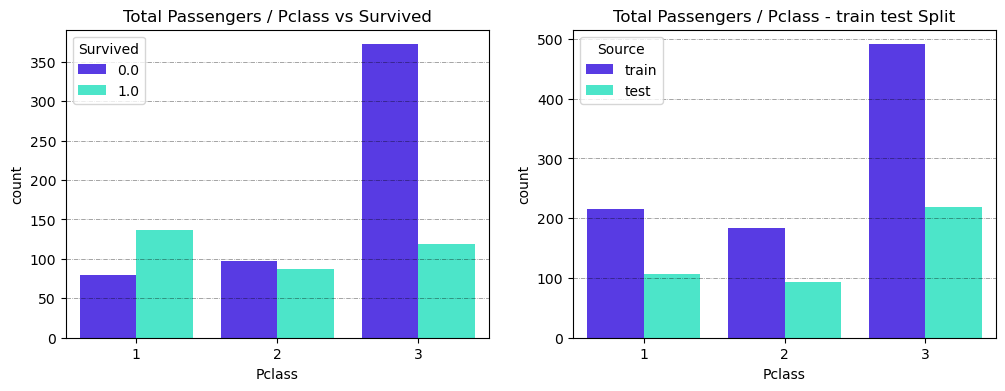

In [82]:
#passenger class vs survival countplot
plot_countplot(df,"Pclass","Pclass vs Survived" , "Pclass - train test Split")#The plot will help visualize any potential relationship between passenger class and survival status.

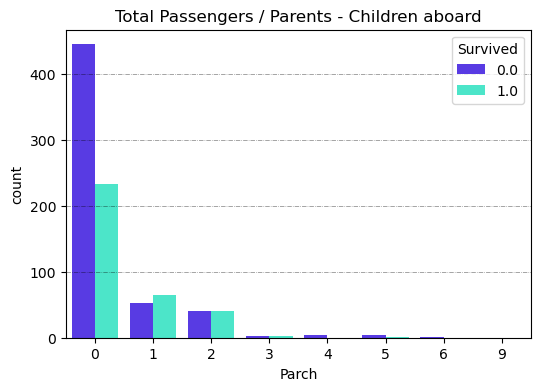

In [83]:
plot_countplot(df, "Parch", "Parents - Children aboard") #This plot will help visualize how many passengers had parents or children accompanying them on the ship.

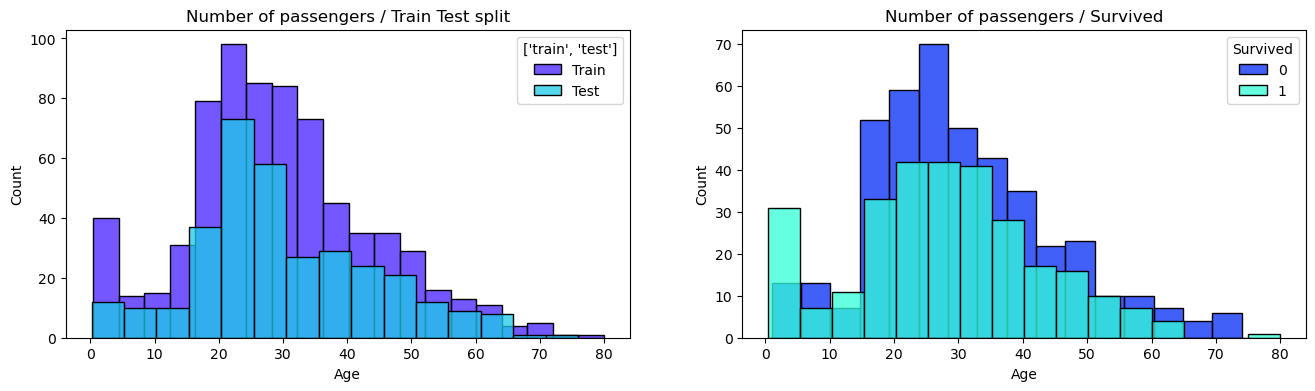

In [84]:
source = df["Source"].unique().tolist()
train = df.loc[df["Source"] == source[0], "Age"]
test = df.loc[df["Source"] == source[1], "Age"]

survived = df["Survived"].unique().tolist()
survived_yes = df.loc[df["Survived"] == survived[0], "Age"]
survived_no = df.loc[df["Survived"] == survived[1], "Age"]

f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))#The size of the figure is determined by the figsize parameter.
g = sns.histplot(data=train,  color=palette_colors[0], ax=ax1, label="Train")# it plots histograms of passenger ages for the training and testing datasets. Different colors are used to distinguish between the two datasets.
sns.histplot(data=test,  color=palette_colors[4], ax=ax1, label="Test")#it plots histograms of passenger ages based on their survival status. The colors differentiate between passengers who survived and those who didn't.

sns.histplot(data=survived_yes,  color=palette_colors[2], ax=ax2, label="0")
sns.histplot(data=survived_no,  color=palette_colors[1], ax=ax2, label="1")

ax1.set_title("Number of passengers / Train Test split")
ax2.set_title("Number of passengers / Survived")#Sets the titles for the subplots.
g.legend(title=source)#Adds legends to the subplots, specifying the labels for each dataset and survival status.
ax2.legend(title="Survived")
plt.show()#This line displays the plot with the specified configurations.


In [86]:
#multivariate analysis
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)# the value will be 1, indicating that the passenger is alone; otherwise, it will be 0.

bins = [0, 12, 18, 60, np.inf]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)#these transformations add useful information to the DataFrame df, making it easier to analyze and interpret the data in subsequent analyses or modeling tasks.

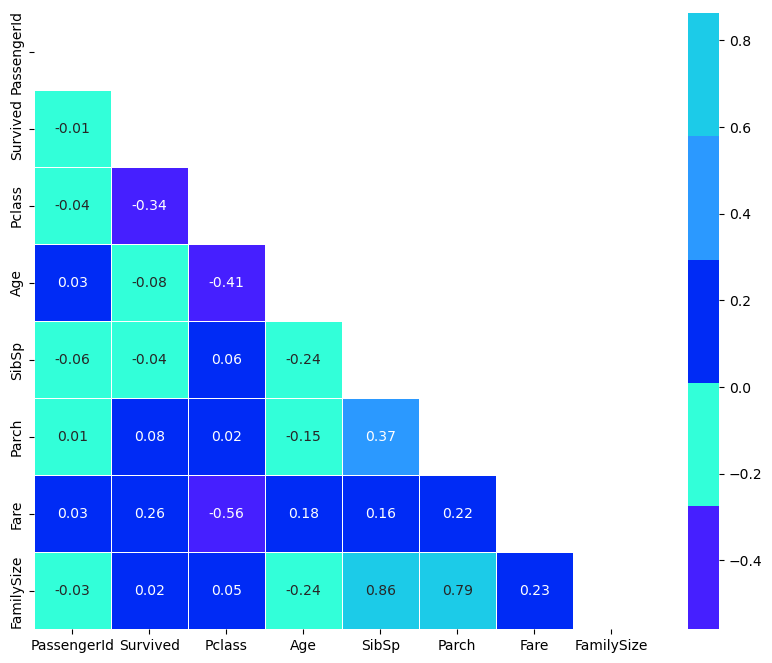

In [87]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])#the result is stored in the dataframe numerical data
correlation_matrix = numerical_df.corr()#the corrleation matrix shows the correlation coeffcients between pairs of numerical features
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) #this is done  by using np.triu function


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap=palette_colors, square=True, linewidths=.5)
# the relationship between different numerical features in the dataset by visualizing the strength and direction of their correlations.
plt.show()

In [88]:
#title vs surviveed 
title_survived_ct = pd.crosstab(df['title'], df['Survived'])
title_survived_ct

Survived,0.0,1.0
title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


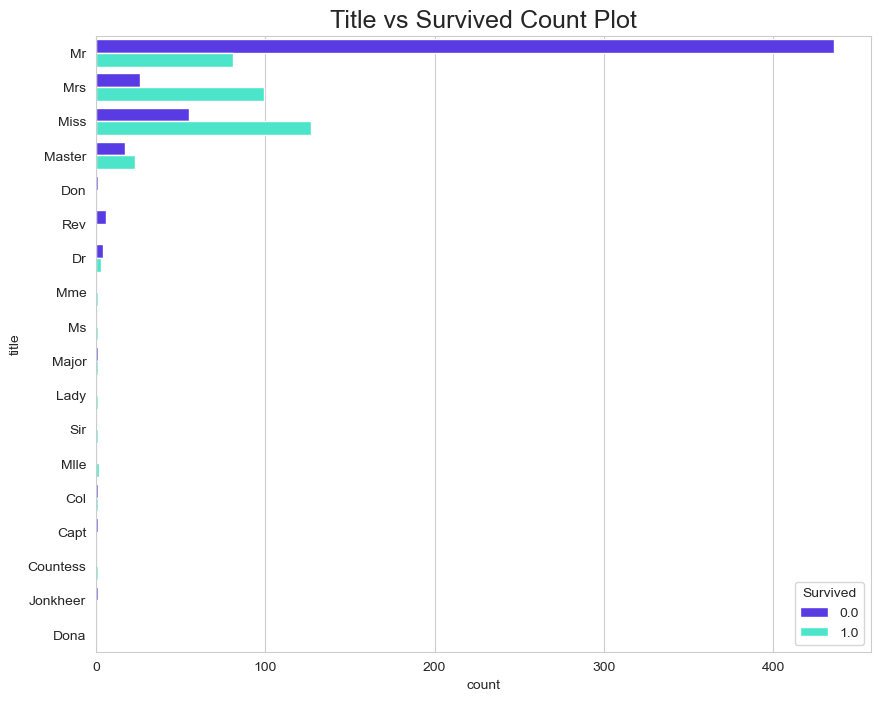

In [89]:
def plot_categorical_distribution(df, first_feature, hue, title):
    sns.set_style("whitegrid", {'axes.grid': True})#This line sets the Seaborn style to "whitegrid", which includes a white background with grid lines.
    plt.figure(figsize=(10, 8))#This line creates a new figure with a specific size for the plot.
    sns.countplot(data=df, y=first_feature, hue=hue, palette=palette_colors)
    plt.title(title, size=18)
    plt.legend(loc='lower right', title=hue)
    plt.show()

plot_categorical_distribution(df, 'title', 'Survived', 'Title vs Survived Count Plot')

<Axes: xlabel='Pclass,Survived'>

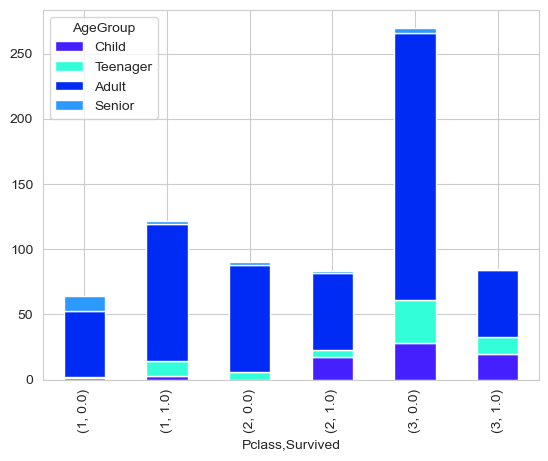

In [90]:
#passenger class and age group survival Distrubtion
pd.crosstab([df['Pclass'], df['Survived']], df['AgeGroup']).plot(kind='bar', stacked=True, color=palette_colors)
#Overall, this code snippet is useful for visually comparing the distribution of age groups among different passenger classes and survival statuses. The stacked bar plot provides insights into how age group distributions vary across different groups of passengers based on their class and survival outcome.

In [92]:
AgeGroup_pclass_survived_ct = pd.crosstab([df['Pclass'],df['Survived']],df['AgeGroup'])
AgeGroup_pclass_survived_ct

AgeGroup         Child  Teenager  Adult  Senior
Pclass Survived                                
1      0.0           1         1     51      11
       1.0           3        11    105       3
2      0.0           0         6     82       2
       1.0          17         6     59       1
3      0.0          28        33    205       4
       1.0          20        13     51       1